In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
train_df = pd.read_csv('data/train.csv')

In [13]:
test_df = pd.read_csv('data/test.csv')

<Axes: >

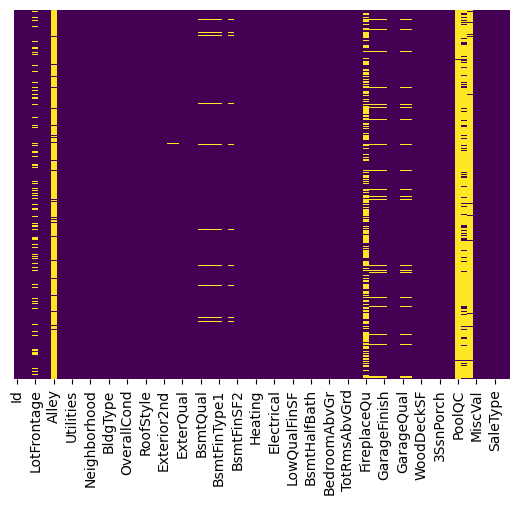

In [4]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [11]:
print(train_df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [10]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())

In [11]:
drop_features = ['Id', 'Alley', 'GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature']
train_df.drop(drop_features, axis=1, inplace=True)
test_df.drop(drop_features, axis=1, inplace=True)


KeyError: "['Alley' 'GarageYrBlt'] not found in axis"

In [9]:

mode_features = ['BsmtCond','BsmtQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'] 

for feature in mode_features:
    train_df[feature] = train_df[feature].fillna(train_df[feature].mode()[0])
    
    test_df[feature] = test_df[feature].fillna(test_df[feature].mode()[0])
    